In [26]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\survey.csv")

In [3]:
df.head(10)        # first 10 rows
df.info()          # data types & nulls
df.isnull().sum()  # missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [4]:
# fix age
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]


In [5]:
#clean gender
df['Gender'] = df['Gender'].str.lower()

def clean_gender(x):
    if 'male' in x:
        return 'Male'
    elif 'female' in x:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)


In [6]:
df.drop(columns=['Timestamp', 'comments'], inplace=True)


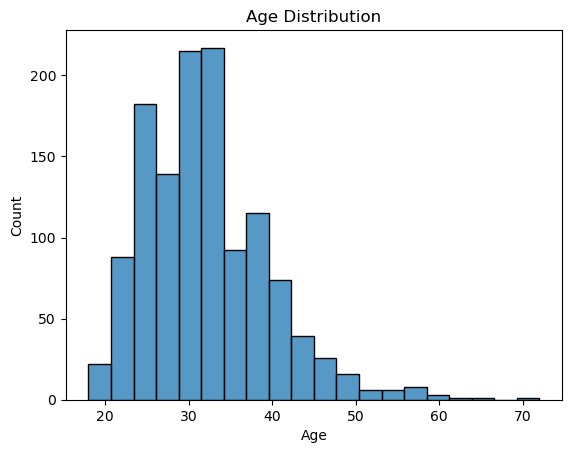

In [7]:
# age distrubution
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution")
plt.show()

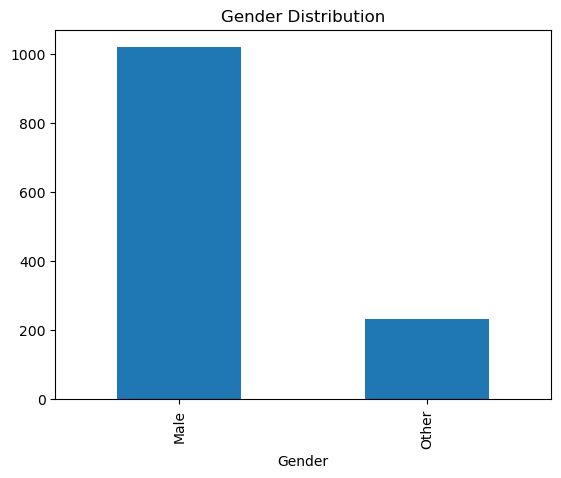

In [8]:
#gender distrubution
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.show()


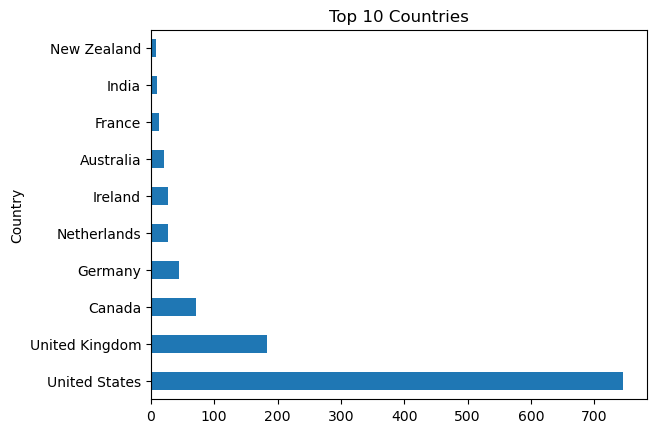

In [9]:
# top 10 countries
df['Country'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Countries")
plt.show()


In [10]:
cols = ['family_history', 'treatment', 'work_interfere', 'self_employed']

for col in cols:
    print(df[col].value_counts())


family_history
No     762
Yes    489
Name: count, dtype: int64
treatment
Yes    632
No     619
Name: count, dtype: int64
work_interfere
Sometimes    464
Never        212
Rarely       173
Often        140
Name: count, dtype: int64
self_employed
No     1091
Yes     142
Name: count, dtype: int64


In [11]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
df = df.dropna(subset=[
    'family_history',
    'treatment',
    'work_interfere',
    'self_employed'
])

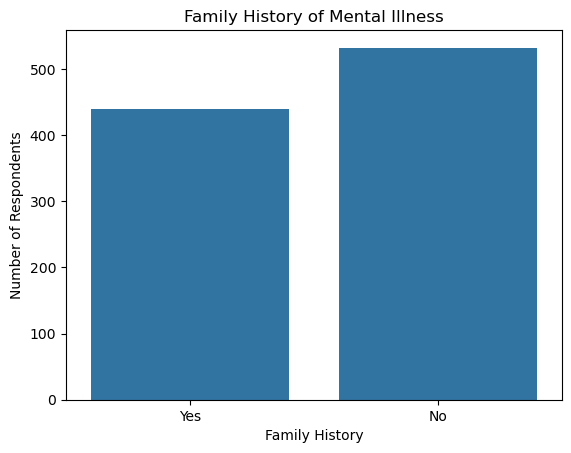

In [12]:
# Mental Health Context
plt.figure()
sns.countplot(x='family_history', data=df)
plt.title("Family History of Mental Illness")
plt.xlabel("Family History")
plt.ylabel("Number of Respondents")
plt.show()


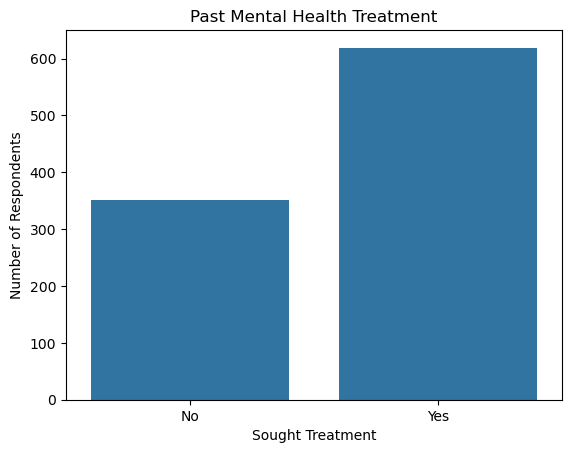

In [13]:
plt.figure()
sns.countplot(x='treatment', data=df)
plt.title("Past Mental Health Treatment")
plt.xlabel("Sought Treatment")
plt.ylabel("Number of Respondents")
plt.show()


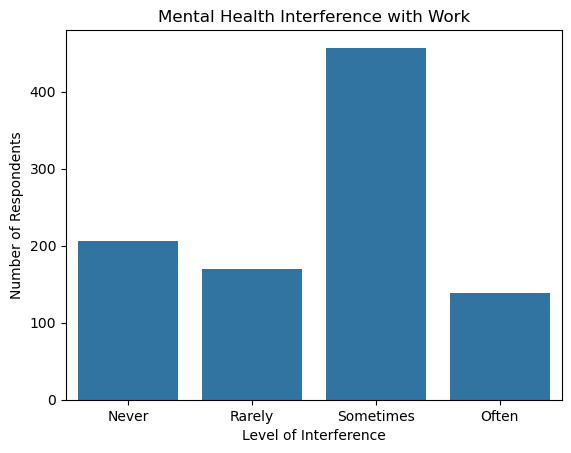

In [14]:
plt.figure()
sns.countplot(x='work_interfere', data=df,
              order=['Never', 'Rarely', 'Sometimes', 'Often'])
plt.title("Mental Health Interference with Work")
plt.xlabel("Level of Interference")
plt.ylabel("Number of Respondents")
plt.show()


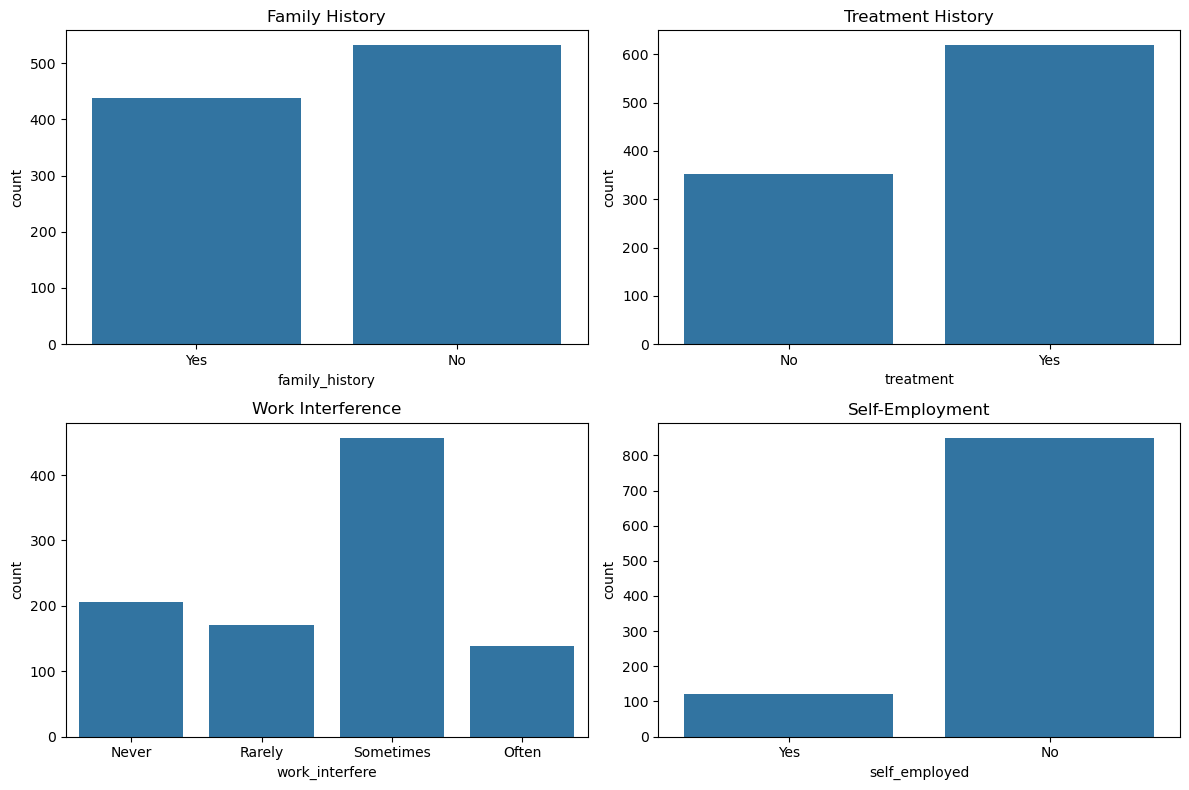

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='family_history', data=df, ax=axes[0,0])
axes[0,0].set_title("Family History")

sns.countplot(x='treatment', data=df, ax=axes[0,1])
axes[0,1].set_title("Treatment History")

sns.countplot(x='work_interfere', data=df,
              order=['Never','Rarely','Sometimes','Often'],
              ax=axes[1,0])
axes[1,0].set_title("Work Interference")

sns.countplot(x='self_employed', data=df, ax=axes[1,1])
axes[1,1].set_title("Self-Employment")

plt.tight_layout()
plt.show()


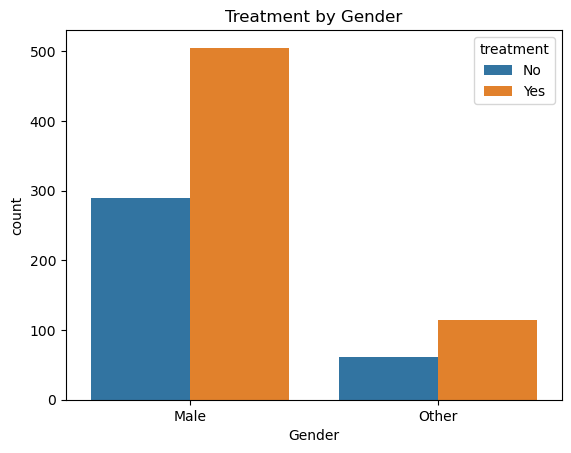

In [16]:
#treatment by gender
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title("Treatment by Gender")
plt.show()


In [17]:
# calculate Country & Work Interference
country_interfere = (
    df[df['work_interfere'] == 'Often']
    .groupby('Country')
    .size() / df.groupby('Country').size()
) * 100

country_interfere.sort_values(ascending=False).head(10)


Country
Czech Republic    100.000000
Denmark           100.000000
Moldova           100.000000
South Africa       60.000000
Colombia           50.000000
Finland            50.000000
Poland             28.571429
Australia          25.000000
France             25.000000
Belgium            25.000000
dtype: float64

In [18]:
pd.crosstab(df['no_employees'], df['benefits'], normalize='index')


benefits,Don't know,No,Yes
no_employees,,,
1-5,0.191176,0.691176,0.117647
100-500,0.313869,0.175182,0.510949
26-100,0.376682,0.255605,0.367713
500-1000,0.302326,0.046512,0.651163
6-25,0.330189,0.448113,0.221698
More than 1000,0.231818,0.072727,0.695455


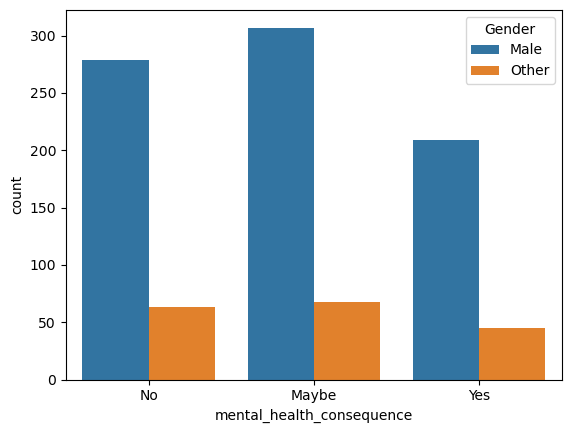

In [20]:
#mental health consequence 
sns.countplot(x='mental_health_consequence', hue='Gender', data=df)
plt.show()


In [21]:
pd.crosstab(df['tech_company'], df['anonymity'], normalize='index')


anonymity,Don't know,No,Yes
tech_company,,,
No,0.576271,0.079096,0.344633
Yes,0.654912,0.049118,0.295970


In [23]:
pd.crosstab(df['remote_work'], df['treatment'], normalize='index')


treatment,No,Yes
remote_work,,
No,0.369276,0.630724
Yes,0.346939,0.653061


In [28]:
#company size vs mental health benifit
benefits_ct = pd.crosstab(
    df['no_employees'],
    df['benefits'],
    normalize='index'
)

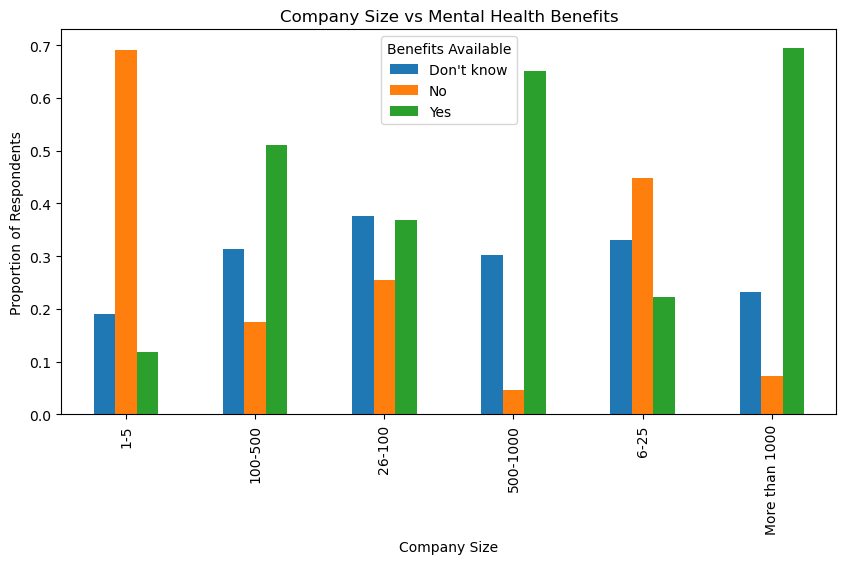

In [29]:
benefits_ct.plot(kind='bar', figsize=(10,5))
plt.title("Company Size vs Mental Health Benefits")
plt.xlabel("Company Size")
plt.ylabel("Proportion of Respondents")
plt.legend(title="Benefits Available")
plt.show()


In [32]:
df.columns


Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [33]:
cols = ['coworkers', 'supervisor', 'mental_health_interview']
df = df[cols].dropna()


In [34]:
comfort_pct = {}

for col in cols:
    comfort_pct[col] = df[col].value_counts(normalize=True) * 100

comfort_df = pd.DataFrame(comfort_pct)
comfort_df


,coworkers,supervisor,mental_health_interview
Maybe,NaN,NaN,14.830072
No,20.700309,32.131823,82.183316
Some of them,61.894954,29.454171,NaN
Yes,17.404737,38.414006,2.986612


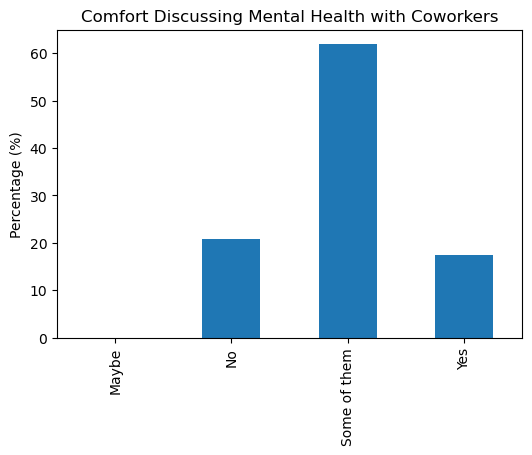

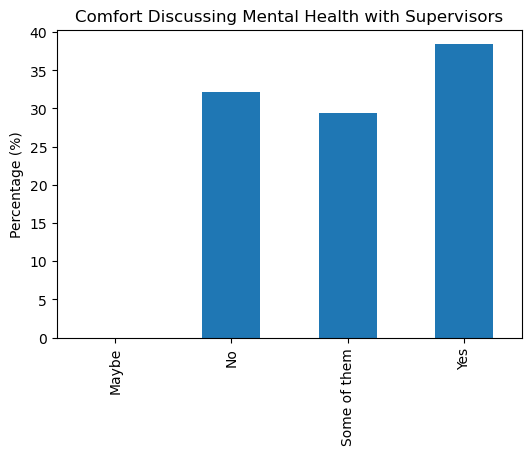

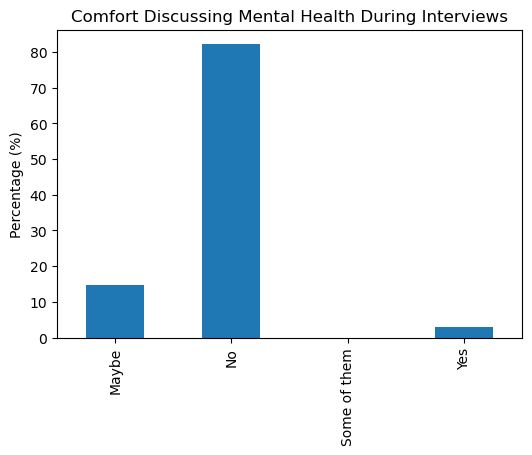

In [35]:
# calculate Discussion Comfort
comfort_df['coworkers'].plot(kind='bar', figsize=(6,4))
plt.title("Comfort Discussing Mental Health with Coworkers")
plt.ylabel("Percentage (%)")
plt.show()

comfort_df['supervisor'].plot(kind='bar', figsize=(6,4))
plt.title("Comfort Discussing Mental Health with Supervisors")
plt.ylabel("Percentage (%)")
plt.show()

comfort_df['mental_health_interview'].plot(kind='bar', figsize=(6,4))
plt.title("Comfort Discussing Mental Health During Interviews")
plt.ylabel("Percentage (%)")
plt.show()


In [48]:
# Anonymity & Consequences ● How do people perceive: Anonymity if seeking help?, Potential negative consequences? , Break this down by employer type (tech_company) and remote workers.

anon_tech = pd.crosstab(
    df['tech_company'],
    df['anonymity'],
    normalize='index'
)
anon_tech


anonymity,Don't know,No,Yes
tech_company,,,
No,0.592105,0.070175,0.337719
Yes,0.663434,0.047527,0.289040


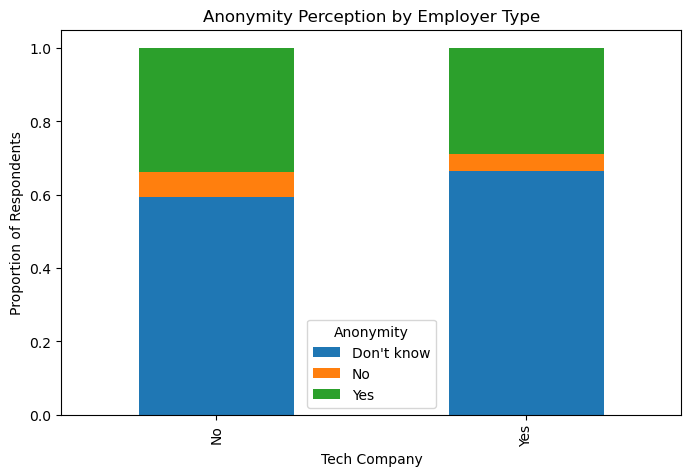

In [49]:
anon_tech.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)
plt.title("Anonymity Perception by Employer Type")
plt.xlabel("Tech Company")
plt.ylabel("Proportion of Respondents")
plt.legend(title="Anonymity")
plt.show()


In [50]:
anon_remote = pd.crosstab(
    df['remote_work'],
    df['anonymity'],
    normalize='index'
)
anon_remote


anonymity,Don't know,No,Yes
remote_work,,,
No,0.648924,0.053228,0.297848
Yes,0.654255,0.047872,0.297872


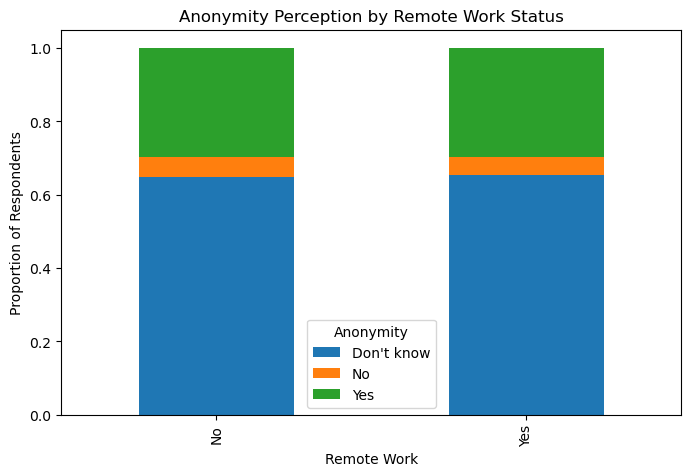

In [51]:
anon_remote.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)
plt.title("Anonymity Perception by Remote Work Status")
plt.xlabel("Remote Work")
plt.ylabel("Proportion of Respondents")
plt.legend(title="Anonymity")
plt.show()


In [54]:
us_df = df[df['Country'] == 'United States'][['state', 'treatment']].dropna()

In [55]:
# U.S. State-wise Patterns
state_treatment_pct = (
    us_df
    .groupby('state')['treatment']
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .sort_values(ascending=False)
)

state_treatment_pct.head(5)


state
MS    100.0
ID    100.0
ME    100.0
LA    100.0
AL     87.5
Name: treatment, dtype: float64

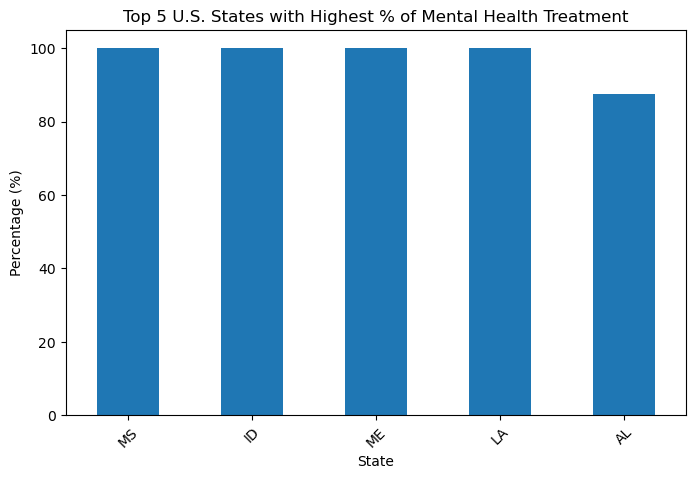

In [56]:
import matplotlib.pyplot as plt

top5_states = state_treatment_pct.head(5)

plt.figure(figsize=(8,5))
top5_states.plot(kind='bar')
plt.title("Top 5 U.S. States with Highest % of Mental Health Treatment")
plt.xlabel("State")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()


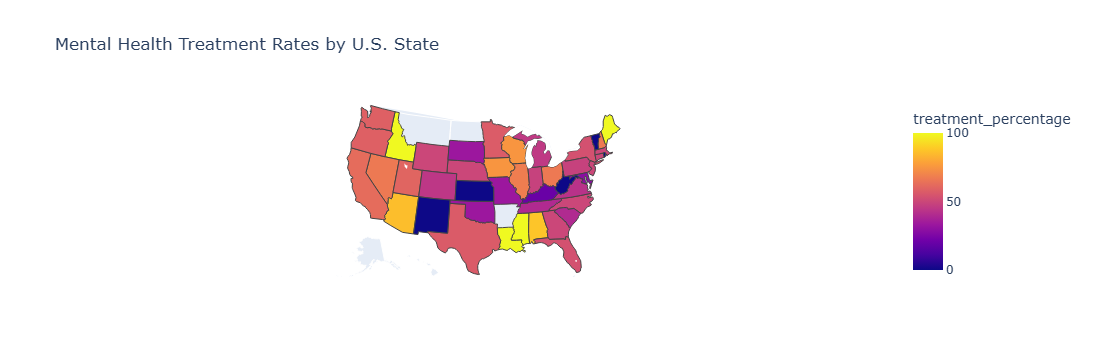

In [57]:
import plotly.express as px

map_df = state_treatment_pct.reset_index()
map_df.columns = ['state', 'treatment_percentage']

fig = px.choropleth(
    map_df,
    locations='state',
    locationmode='USA-states',
    color='treatment_percentage',
    scope='usa',
    title='Mental Health Treatment Rates by U.S. State'
)

fig.show()


In [58]:
cols = [
    'remote_work',
    'treatment',
    'mental_health_vs_physical'
]

In [59]:
#Remote Work Effect
treatment_remote = pd.crosstab(
    df['remote_work'],
    df['treatment'],
    normalize='index'
) * 100

treatment_remote


treatment,No,Yes
remote_work,,
No,50.283126,49.716874
Yes,47.340426,52.659574


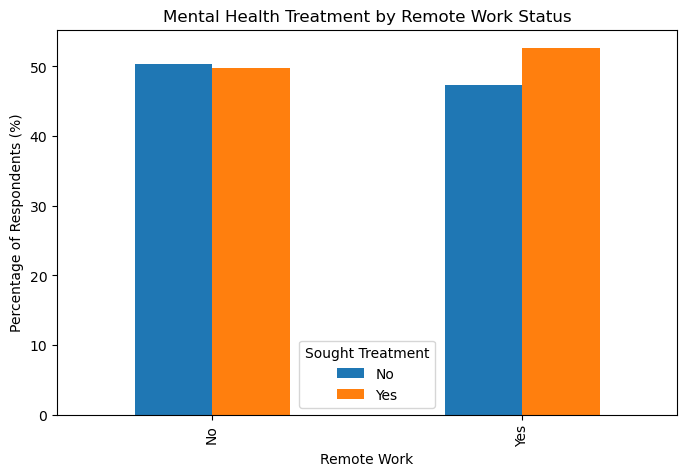

In [60]:
treatment_remote.plot(
    kind='bar',
    figsize=(8,5)
)
plt.title("Mental Health Treatment by Remote Work Status")
plt.xlabel("Remote Work")
plt.ylabel("Percentage of Respondents (%)")
plt.legend(title="Sought Treatment")
plt.show()


In [65]:
cols = [
    'treatment',
    'work_interfere',
    'family_history',
    'remote_work',
    'tech_company',
    'benefits',
    'care_options',
    'wellness_program'
]

df_corr = df[cols].dropna()


In [66]:
binary_map = {'Yes': 1, 'No': 0}

df_corr = df_corr.replace(binary_map)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9548\1880690576.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [67]:
work_map = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3
}

df_corr['work_interfere'] = df_corr['work_interfere'].map(work_map)


In [69]:
import numpy as np

df_corr = df_corr.replace("Don't know", np.nan)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9548\877685770.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
# calculate Correlation Analysis

In [70]:
binary_map = {'Yes': 1, 'No': 0}
df_corr = df_corr.replace(binary_map)


In [71]:
binary_map = {'Yes': 1, 'No': 0}
df_corr = df_corr.replace(binary_map)


In [72]:
binary_map = {'Yes': 1, 'No': 0}
df_corr = df_corr.replace(binary_map)


In [73]:
work_map = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3
}

df_corr['work_interfere'] = df_corr['work_interfere'].map(work_map)


In [75]:
import numpy as np

# Replace "Don't know"
df_corr = df_corr.replace("Don't know", np.nan)

# Encode Yes/No
df_corr = df_corr.replace({'Yes': 1, 'No': 0})

# Encode work interference
df_corr['work_interfere'] = df_corr['work_interfere'].map({
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3
})

# Remove non-numeric rows
df_corr = df_corr.dropna()

# Correlation
corr_matrix = df_corr.corr()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning:

All-NaN slice encountered

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning:

All-NaN slice encountered



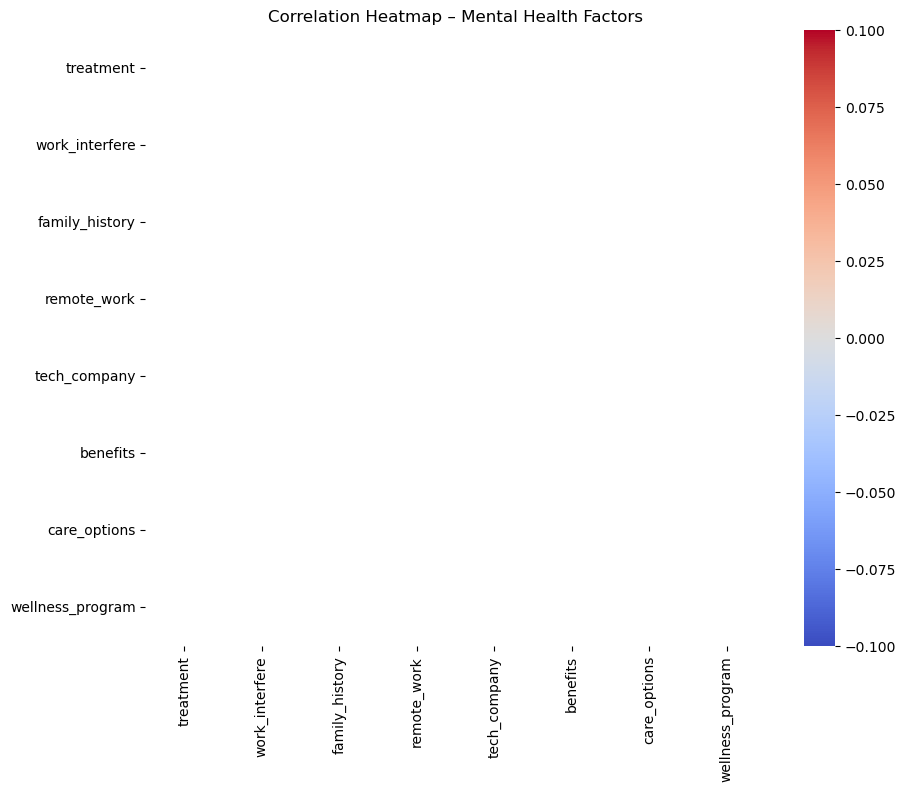

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Correlation Heatmap – Mental Health Factors")
plt.show()
